# 1. Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
splits = {'train': 'train.jsonl', 'test': 'test.jsonl'}

# Load the training dataset
df_train = pd.read_json("hf://datasets/SetFit/enron_spam/" + splits["train"], lines=True)

# Load the testing dataset
df_test = pd.read_json("hf://datasets/SetFit/enron_spam/" + splits["test"], lines=True)


In [3]:
print(f"Training dataset shape : {df_train.shape}\nTesting dataset shape  : {df_test.shape}")

Training dataset shape : (31716, 7)
Testing dataset shape  : (2000, 7)


In [4]:
print(f"The size of the training dataset  {df_train.shape}")
df_train.head(5) 

The size of the training dataset  (31716, 7)


,message_id,text,label,label_text,subject,message,date
0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


In [5]:
print(f"The size of the testing dataset  {df_test.shape}")
df_test.head(5) 

The size of the testing dataset  (2000, 7)


,message_id,text,label,label_text,subject,message,date
0,31329,expande tu imagen ! ! ! ! ! ! ! ! ! si no pued...,1,spam,expande tu imagen ! ! ! ! ! ! ! ! !,"si no puede ver este mail , entre a : http : /...",2005-01-19
1,3969,paliourg learning for life enlarge your member...,1,spam,paliourg learning for life,enlarge your member\nzenextend enlargement pil...,2004-05-06
2,27070,"cure premature ejaculation hello ,\ndid you ej...",1,spam,cure premature ejaculation,"hello ,\ndid you ejaculate before or within a ...",2005-07-17
3,2779,re : noms / actual flow for 3 / 19 / 01 we agr...,0,ham,re : noms / actual flow for 3 / 19 / 01,"we agree\n"" eileen ponton "" on 03 / 20 / 2001 ...",2001-03-20
4,2949,ehronline web address change this message is i...,0,ham,ehronline web address change,this message is intended for ehronline users o...,2001-03-30


### Dataset Description

This dataset is taken from the Enron Spam Dataset available on Hugging Face  [https://huggingface.co/datasets/SetFit/enron_spam]
It contains real emails from the Enron corpus labeled as spam or ham (not spam

| **Column**     | **Explanation** |
|----------------|-----------------|
| `message_id`   | The email number identifier in the overall emails. |
| `Text`         | Concatenation of the subject and message of the email, after removing unwanted spaces. |
| `Label`        | Integer value (`0` or `1`) indicating whether the email is ham (`0`) or spam (`1`). |
| `label_text`   | Text label corresponding to the classification — either `"spam"` or `"ham"`. |
| `Subject`      | The title line of the email. |
| `Message`      | The body of the email. May be empty if the email has only a subject line. In replies or forwarded mails, it contains the initial message including “From:”, “To:”, etc. |
| `Date`         | The date of arrival of the email, formatted as `YYYY-MM-DD`. |


###  Feature Selection

Because the goal of this project is to detect whether an email is spam or not,  
the focus is only on the following columns:

- **`label`** → contains the target class (0 = ham, 1 = spam)  
- **`text`** → contains the concatenation of the email subject and message body  

The other columns (such as `date`, `subject`, `message_id`, etc.) are either:

- not directly useful for text-based spam detection, or  
- already merged into the `text` column  

Therefore, they are **excluded from the model training process**.


In [6]:
df_train = df_train[["text" , "label"]].copy()
df_test  = df_test[["text" , "label"]].copy()

df_train.head(5)

,text,label
0,any software just for 15 $ - 99 $ understandin...,1
1,perspective on ferc regulatory action client c...,0
2,wanted to try ci 4 lis but thought it was way ...,1
3,"enron / hpl actuals for december 11 , 2000 tec...",0
4,looking for cheap high - quality software ? ro...,1


In [7]:
# Check null values
print(f"Training set - null values in 'text': {df_train['text'].isnull().sum()}")
print(f"Testing set - null values in 'text': {df_test['text'].isnull().sum()}")


# Check duplicated values
print(f"Training set - duplicated messages in 'text': {df_train['text'].duplicated().sum()}")
print(f"Testing set - duplicated messages in 'text': {df_test['text'].duplicated().sum()}")

Training set - null values in 'text': 0
Testing set - null values in 'text': 0
Training set - duplicated messages in 'text': 2904
Testing set - duplicated messages in 'text': 18


In [8]:
#Remove duplicates Rows
df_train = df_train.drop_duplicates(subset=['text'])
df_test = df_test.drop_duplicates(subset=['text'])
print(f"Training set shape after removing duplicates: {df_train.shape}")
print(f"Testing set shape after removing duplicates: {df_test.shape}")


Training set shape after removing duplicates: (28812, 2)
Testing set shape after removing duplicates: (1982, 2)


label
0    14982
1    13830
Name: count, dtype: int64


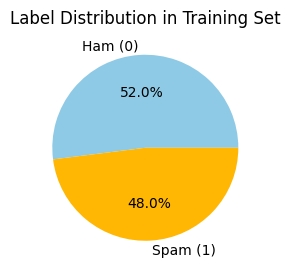

In [9]:
# Count of each label
label_counts = df_train['label'].value_counts()
print(label_counts)


# Pie chart
plt.figure(figsize=(3,6))
plt.pie(label_counts.values, labels=['Ham (0)', 'Spam (1)'], autopct='%1.1f%%', colors=['#8ecae6','#ffb703'])
plt.title("Label Distribution in Training Set")
plt.show()


With **48% ham** and **52% spam**, the dataset is quite balanced

# 2.preprocessing

In [10]:
import sys
sys.path.append('/kaggle/input/preprocessing-utils')  

from preprocessing_utils import ( 
    calculate_suspicious_char_ratio, 
    calculate_suspicious_words_ratio,
    preprocess_text
)


In [11]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")



[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# # Load English spaCy model for NER
# nlp = spacy.load("en_core_web_sm", disable=["parser", "tagger", "lemmatizer", "attribute_ruler"])


# greetings = [
#     'dear', 'hi', 'hello', 'hey', 'greetings',
#     'regards', 'best', 'thanks', 'thank',
#     'sincerely', 'cheers', 'respectfully', 'welcome', 'goodbye'
# ]

# STOPWORDS = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

# GREETINGS_PATTERN = re.compile(r'\b(?:' + '|'.join(map(re.escape, greetings)) + r')\b', re.IGNORECASE)
# URL_PATTERN = re.compile(r'http\S+|www\S+')
# NON_ALPHA_PATTERN = re.compile(r'[^a-zA-Z]')
# EMAIL_PATTERN = re.compile(r'\b[\w\.-]+@[\w\.-]+\.\w+\b')

# def preprocess_text(text, min_len=2, max_len=13):
#     # Lowercase
#     text = text.lower()

#     # Remove URLs
#     text = URL_PATTERN.sub(' ', text)

#     # Remove email addresses
#     text = EMAIL_PATTERN.sub(' ', text)

#     # Remove greetings
#     text = GREETINGS_PATTERN.sub(' ', text)

#     # Remove punctuation/non-alpha
#     text = NON_ALPHA_PATTERN.sub(' ', text)

#     # Run spaCy NER BEFORE tokenization
#     doc = nlp(text)
#     text_no_names = ' '.join([t.text for t in doc if t.ent_type_ != "PERSON"])

#     # Tokenize
#     tokens = word_tokenize(text)

#     # Remove stopwords
#     tokens = [t for t in tokens if t not in STOPWORDS]

#     # Remove short/long words
#     tokens = [t for t in tokens if min_len <= len(t) <= max_len]

#     # Lemmatize
#     tokens = [lemmatizer.lemmatize(t) for t in tokens]

#     return tokens

In our emails, there are some suspicious characters. During preprocessing, these characters may be removed to obtain a clean version of the text for the model. However, we need to take them into consideration because they play an important role in detecting whether an email is spam or not.

As we know, there are some obvious words that can be considered spam indicators. We also add a function to count these words. For both functions (suspicious words and characters), we use the ratio rather than the raw count. Using the ratio helps us understand more clearly how likely an email is to be spam.

In [13]:
#Adding the new columns in the training set 
df_train['suspicious_char_ratio'] = df_train['text'].apply(calculate_suspicious_char_ratio)
df_train['suspicious_word_ratio'] = df_train['text'].apply(calculate_suspicious_words_ratio)

#Adding the new columns in the testing set 
df_test['suspicious_char_ratio'] = df_test['text'].apply(calculate_suspicious_char_ratio)
df_test['suspicious_word_ratio'] = df_test['text'].apply(calculate_suspicious_words_ratio)


In [14]:
df_train.head(3)

,text,label,suspicious_char_ratio,suspicious_word_ratio
0,any software just for 15 $ - 99 $ understandin...,1,0.060606,0.000000
1,perspective on ferc regulatory action client c...,0,0.000000,0.004184
2,wanted to try ci 4 lis but thought it was way ...,1,0.036364,0.036364


In [15]:
df_test.head(3)

,text,label,suspicious_char_ratio,suspicious_word_ratio
0,expande tu imagen ! ! ! ! ! ! ! ! ! si no pued...,1,0.067164,0.000000
1,paliourg learning for life enlarge your member...,1,0.000000,0.043478
2,"cure premature ejaculation hello ,\ndid you ej...",1,0.000000,0.000000


In [16]:
# preprocessing the training set 
df_train['clean_tokens'] = df_train['text'].apply(preprocess_text)
df_train['clean_text'] = df_train['clean_tokens'].apply(lambda x: " ".join(x))

# preprocessing the testing set 
df_test['clean_tokens'] = df_test['text'].apply(preprocess_text)
df_test['clean_text'] = df_test['clean_tokens'].apply(lambda x: " ".join(x))

In [17]:
df_train.head(3)

,text,label,suspicious_char_ratio,suspicious_word_ratio,clean_tokens,clean_text
0,any software just for 15 $ - 99 $ understandin...,1,0.060606,0.000000,"[software, understanding, oem, software, lead,...",software understanding oem software lead tempt...
1,perspective on ferc regulatory action client c...,0,0.000000,0.004184,"[perspective, ferc, regulatory, action, client...",perspective ferc regulatory action client conf...
2,wanted to try ci 4 lis but thought it was way ...,1,0.036364,0.036364,"[wanted, try, ci, li, thought, way, expensive,...",wanted try ci li thought way expensive viagra ...


In [18]:
df_test.head(3)

,text,label,suspicious_char_ratio,suspicious_word_ratio,clean_tokens,clean_text
0,expande tu imagen ! ! ! ! ! ! ! ! ! si no pued...,1,0.067164,0.000000,"[expande, tu, imagen, si, puede, ver, este, ma...",expande tu imagen si puede ver este mail entre...
1,paliourg learning for life enlarge your member...,1,0.000000,0.043478,"[paliourg, learning, life, enlarge, member, ze...",paliourg learning life enlarge member zenexten...
2,"cure premature ejaculation hello ,\ndid you ej...",1,0.000000,0.000000,"[cure, premature, ejaculation, ejaculate, with...",cure premature ejaculation ejaculate within mi...


In [19]:
# The number of duplicated rows in the 'clean_text' column 
num_duplicates_train = df_train['clean_text'].duplicated().sum()
num_duplicates_test = df_test['clean_text'].duplicated().sum()


print(f"Training set duplicated messages: {num_duplicates_train}")
print(f"Testing set duplicated messages: {num_duplicates_test}")

Training set duplicated messages: 1385
Testing set duplicated messages: 55


After cleaning, the dataset still contains some duplicated messages. That’s why it is important to examine all the data.

By including features such as the suspicious word ratio and suspicious character ratio, we can identify whether there are truly duplicate entries.

In [20]:
greetings = [
    'dear', 'hi', 'hello', 'hey', 'greetings',
    'regards', 'best', 'thanks', 'thank',
    'sincerely', 'cheers', 'respectfully','welcome','goodbye'
]
STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

GREETINGS_PATTERN = re.compile(r'\b(?:' + '|'.join(map(re.escape, greetings)) + r')\b', re.IGNORECASE)
URL_PATTERN = re.compile(r'http\S+|www\S+')
NON_ALPHA_PATTERN = re.compile(r'[^a-zA-Z]')
EMAIL_PATTERN = re.compile(r'\b[\w\.-]+@[\w\.-]+\.\w+\b')

def preprocess_text(text, min_len=2, max_len=13):
    # Remove <img> tags only
    text = re.sub(r'<img[^>]*>', ' ', text, flags=re.IGNORECASE)
    /
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = URL_PATTERN.sub(' ', text)
    
    # Remove greetings
    text = GREETINGS_PATTERN.sub(' ', text)
    
    # Remove punctuation/non-alpha
    text = NON_ALPHA_PATTERN.sub(' ', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [t for t in tokens if t not in STOPWORDS]
    
    # Keep reasonable token lengths
    tokens = [t for t in tokens if min_len <= len(t) <= max_len]
    
    # Lemmatize
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    return tokens

In [21]:
columns_to_check = ['clean_text', 'suspicious_word_ratio', 'suspicious_char_ratio', 'label']

num_duplicates_full_train = df_train[columns_to_check].duplicated().sum()
num_duplicates_full_test = df_test[columns_to_check].duplicated().sum()

print(f"Training set fully duplicated rows: {num_duplicates_full_train}")
print(f"Testing set fully duplicated rows: {num_duplicates_full_test}")


Training set fully duplicated rows: 1330
Testing set fully duplicated rows: 52


In [22]:
# Remove duplicates based on these columns
df_train = df_train.drop_duplicates(subset=columns_to_check)
df_test = df_test.drop_duplicates(subset=columns_to_check)

print(f"Training set shape after removing duplicates: {df_train.shape}")
print(f"Testing set shape after removing duplicates: {df_test.shape}")


Training set shape after removing duplicates: (27482, 6)
Testing set shape after removing duplicates: (1930, 6)


In [23]:
df_train.head(3)

,text,label,suspicious_char_ratio,suspicious_word_ratio,clean_tokens,clean_text
0,any software just for 15 $ - 99 $ understandin...,1,0.060606,0.000000,"[software, understanding, oem, software, lead,...",software understanding oem software lead tempt...
1,perspective on ferc regulatory action client c...,0,0.000000,0.004184,"[perspective, ferc, regulatory, action, client...",perspective ferc regulatory action client conf...
2,wanted to try ci 4 lis but thought it was way ...,1,0.036364,0.036364,"[wanted, try, ci, li, thought, way, expensive,...",wanted try ci li thought way expensive viagra ...


In [24]:
df_test.head(3)

,text,label,suspicious_char_ratio,suspicious_word_ratio,clean_tokens,clean_text
0,expande tu imagen ! ! ! ! ! ! ! ! ! si no pued...,1,0.067164,0.000000,"[expande, tu, imagen, si, puede, ver, este, ma...",expande tu imagen si puede ver este mail entre...
1,paliourg learning for life enlarge your member...,1,0.000000,0.043478,"[paliourg, learning, life, enlarge, member, ze...",paliourg learning life enlarge member zenexten...
2,"cure premature ejaculation hello ,\ndid you ej...",1,0.000000,0.000000,"[cure, premature, ejaculation, ejaculate, with...",cure premature ejaculation ejaculate within mi...


# 3.Representation

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy import sparse
from preprocessing_utils import create_feature_matrices

In [26]:
df_train = df_train[["clean_text", "suspicious_char_ratio", "suspicious_word_ratio", "label"]].copy()
df_test = df_test[["clean_text", "suspicious_char_ratio", "suspicious_word_ratio", "label"]].copy()


In [27]:
df_train.head(3)

,clean_text,suspicious_char_ratio,suspicious_word_ratio,label
0,software understanding oem software lead tempt...,0.060606,0.000000,1
1,perspective ferc regulatory action client conf...,0.000000,0.004184,0
2,wanted try ci li thought way expensive viagra ...,0.036364,0.036364,1


In [28]:
df_test.head(3)

,clean_text,suspicious_char_ratio,suspicious_word_ratio,label
0,expande tu imagen si puede ver este mail entre...,0.067164,0.000000,1
1,paliourg learning life enlarge member zenexten...,0.000000,0.043478,1
2,cure premature ejaculation ejaculate within mi...,0.000000,0.000000,1


### Grid search for TF-IDF ###
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best F1-score: 0.9839
Best parameters: {'vec__ngram_range': (1, 2)}

### Grid search for BOW ###
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best F1-score: 0.9856
Best parameters: {'vec__ngram_range': (1, 1)}

In [29]:
#Normalize numeric features
numeric_cols = ['suspicious_word_ratio', 'suspicious_char_ratio']

scaler = MinMaxScaler()
numeric_features_scaled_train = scaler.fit_transform(df_train[numeric_cols])
numeric_features_scaled_test = scaler.transform(df_test[numeric_cols])


In [30]:
# --- Numeric features ---
numeric_cols = ['suspicious_word_ratio', 'suspicious_char_ratio']

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf, X_test_tfidf, tfidf_vectorizer = create_feature_matrices(
    df_train, df_test, tfidf_vectorizer, numeric_features_scaled_train, numeric_features_scaled_test
)
print("TF-IDF + numeric shape:", X_train_tfidf.shape, X_test_tfidf.shape)

# BOW
bow_vectorizer = CountVectorizer(ngram_range=(1,1))
X_train_bow, X_test_bow, bow_vectorizer = create_feature_matrices(
    df_train, df_test, bow_vectorizer, numeric_features_scaled_train, numeric_features_scaled_test
)
print("BOW + numeric shape:", X_train_bow.shape, X_test_bow.shape)


TF-IDF + numeric shape: (27482, 1541162) (1930, 1541162)
BOW + numeric shape: (27482, 125974) (1930, 125974)


In [31]:
# Extract labels
y_train = df_train['label'].values
y_test = df_test['label'].values
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (27482,)
y_test shape: (1930,)


# 4.Modeling

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


In [33]:
#Train multiple models and store predictions, accuracy, classification reports, and confusion matrices.
def train_models(models, X_train, X_test, y_train, y_test):
    
    trained_models = {}
    y_preds = {}
    metrics = {}
    conf_matrices = {}
    
    for name, model in models.items():
        print(f"Training {name} ...")
        model.fit(X_train, y_train)
        
        # Store trained model
        trained_models[name] = model
        
        # Predict on test set
        y_pred = model.predict(X_test)
        y_preds[name] = y_pred
        
        # Compute metrics
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        metrics[name] = {
            "accuracy": acc,
            "classification_report": report
        }
        
        # Store confusion matrix
        conf_matrices[name] = confusion_matrix(y_test, y_pred)
        
        # Print summary
        print(f"✅ {name} trained. Test Accuracy: {acc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
    
    return trained_models, y_preds, metrics, conf_matrices


In [34]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM (LinearSVC)": LinearSVC()
}


In [35]:
# Training the models on TF-IDF features
trained_models_tfidf, y_preds_tfidf, metrics_tfidf, conf_matrices_tfidf = train_models(
    models, X_train_tfidf, X_test_tfidf, y_train, y_test
)

Training Logistic Regression ...
✅ Logistic Regression trained. Test Accuracy: 0.9865
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       937
           1       0.98      0.99      0.99       993

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930

Training Naive Bayes ...
✅ Naive Bayes trained. Test Accuracy: 0.9933
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       937
           1       0.99      0.99      0.99       993

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930

Training SVM (LinearSVC) ...
✅ SVM (LinearSVC) trained. Test Accuracy: 0.9912
Classification Report:
              precision    recall  f1-score

In [36]:
# Training the  models on BOW features
trained_models_bow, y_preds_bow, metrics_bow, conf_matrices_bow = train_models(
    models, X_train_bow, X_test_bow, y_train, y_test
)

Training Logistic Regression ...
✅ Logistic Regression trained. Test Accuracy: 0.9834
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       937
           1       0.98      0.99      0.98       993

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930

Training Naive Bayes ...
✅ Naive Bayes trained. Test Accuracy: 0.9855
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       937
           1       0.99      0.98      0.99       993

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930

Training SVM (LinearSVC) ...
✅ SVM (LinearSVC) trained. Test Accuracy: 0.9819
Classification Report:
              precision    recall  f1-score

# 5.Evaluation

In [37]:
# function that convert metrics dictionary into a DataFrame
def metrics_to_df(metrics_dict, feature_type):
    data = []
    for model_name, metric in metrics_dict.items():
        acc = metric['accuracy']
        precision = metric['classification_report']['weighted avg']['precision']
        recall = metric['classification_report']['weighted avg']['recall']
        f1 = metric['classification_report']['weighted avg']['f1-score']
        
        data.append({
            'Model': model_name,
            'Feature': feature_type,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        })
    
    return pd.DataFrame(data)

# Creating a  DataFrames for TF-IDF and BOW
df_tfidf = metrics_to_df(metrics_tfidf, 'TF-IDF')
df_bow = metrics_to_df(metrics_bow, 'BOW')

# Combining both df into a single DataFrame
df_metrics = pd.concat([df_tfidf, df_bow], ignore_index=True)

# Sorting the combined DataFrame by F1-score (descending)
df_metrics.sort_values(by='F1-score', ascending=False).reset_index(drop=True)

,Model,Feature,Accuracy,Precision,Recall,F1-score
0,Naive Bayes,TF-IDF,0.993264,0.993265,0.993264,0.993264
1,SVM (LinearSVC),TF-IDF,0.991192,0.991204,0.991192,0.991191
2,Logistic Regression,TF-IDF,0.986528,0.986599,0.986528,0.986526
3,Naive Bayes,BOW,0.985492,0.985502,0.985492,0.985493
4,Logistic Regression,BOW,0.983420,0.983449,0.983420,0.983417
5,SVM (LinearSVC),BOW,0.981865,0.981865,0.981865,0.981865


# 

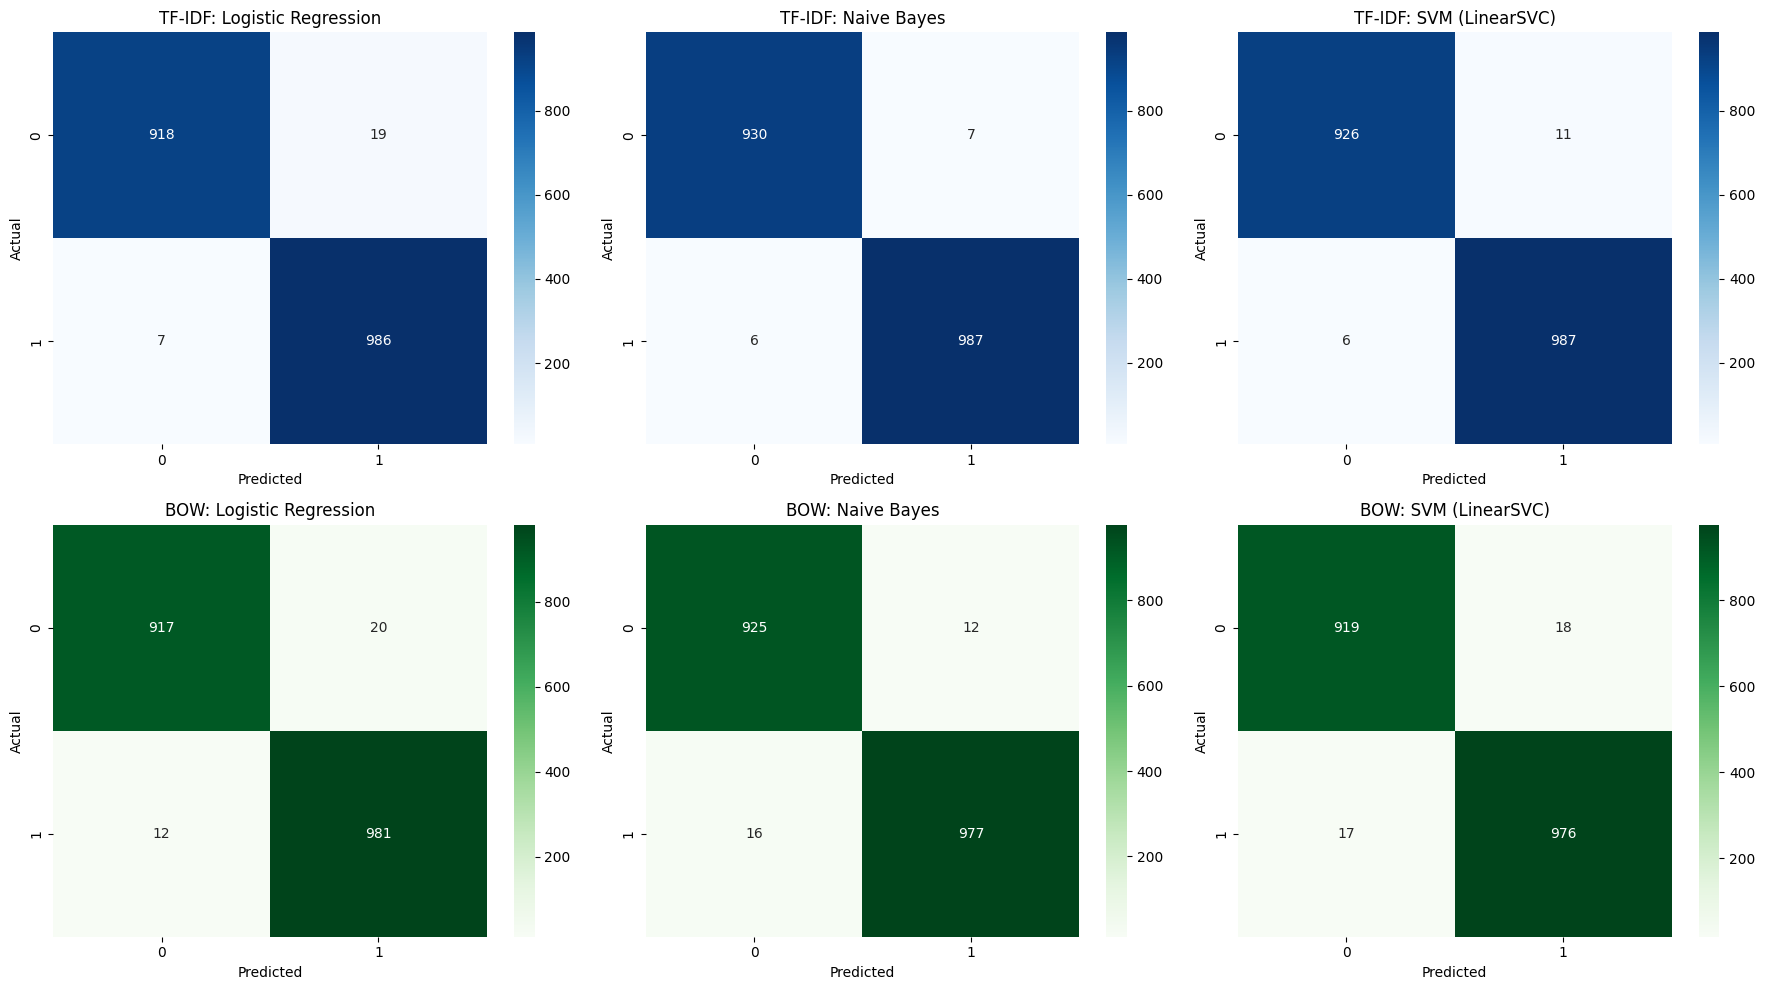

In [38]:
def plot_confusion_matrices_grid(conf_matrices_tfidf, conf_matrices_bow):
   
    # Limit to top 3 models if more
    tfidf_items = list(conf_matrices_tfidf.items())[:3]
    bow_items = list(conf_matrices_bow.items())[:3]

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

    # Plot TF-IDF matrices in first row
    for i, (model_name, cm) in enumerate(tfidf_items):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, i])
        axes[0, i].set_title(f'TF-IDF: {model_name}')
        axes[0, i].set_xlabel('Predicted')
        axes[0, i].set_ylabel('Actual')

    # Plot BOW matrices in second row
    for i, (model_name, cm) in enumerate(bow_items):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[1, i])
        axes[1, i].set_title(f'BOW: {model_name}')
        axes[1, i].set_xlabel('Predicted')
        axes[1, i].set_ylabel('Actual')

    # Hide empty subplots if less than 3 models
    for j in range(len(tfidf_items), 3):
        axes[0, j].axis('off')
    for j in range(len(bow_items), 3):
        axes[1, j].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function
plot_confusion_matrices_grid(conf_matrices_tfidf, conf_matrices_bow)


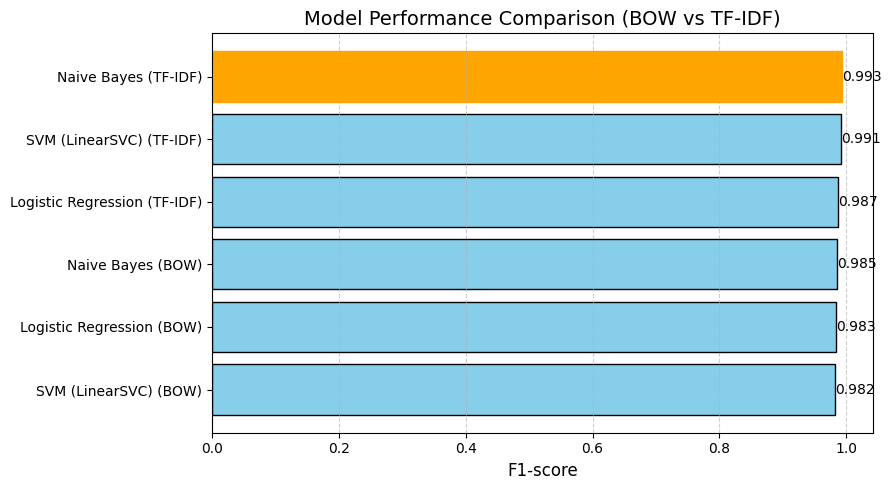

In [39]:
import matplotlib.pyplot as plt

# Sort by F1-score (descending)
df_plot = df_metrics.sort_values(by='F1-score', ascending=True)

# Combine model and feature for display
df_plot['Model_Feature'] = df_plot['Model'] + " (" + df_plot['Feature'] + ")"

# Plot horizontal bars
plt.figure(figsize=(9, 5))
bars = plt.barh(df_plot['Model_Feature'], df_plot['F1-score'], color='skyblue', edgecolor='black')

# Highlight the best one
best_idx = df_plot['F1-score'].idxmax()
bars[list(df_plot.index).index(best_idx)].set_color('orange')

# Labels and title
plt.xlabel('F1-score', fontsize=12)
plt.title('Model Performance Comparison (BOW vs TF-IDF)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add score labels on each bar
for i, v in enumerate(df_plot['F1-score']):
    plt.text(v + 0.0003, i, f"{v:.3f}", va='center')

plt.tight_layout()
plt.show()


After all the evaluations, we can conclude that the best model across all metrics is Naive Bayes, achieving an accuracy of 0.99 and an F1-score of 0.99. Even the confusion matrix shows that it minimizes errors effectively.

# 6.Application

The Naive Bayes model is the best. We are going to load it along with its vectorizer, and also the scaler that we used to normalize the values of the numerical columns.

In [40]:
from sklearn.naive_bayes import MultinomialNB
import joblib


In [41]:
#  Train Naive Bayes on TF-IDF features
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

# Saving the trained model
joblib.dump(nb_tfidf, "naive_bayes_model.joblib")
print("Model saved as 'naive_bayes_model.joblib'")

# Saving the TF-IDF vectorizer 
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.joblib")
print("TF-IDF vectorizer saved as 'tfidf_vectorizer.joblib'")

# Save the Scaler
joblib.dump(scaler, "scaler.joblib")
print("Scaler saved as 'scaler.joblib' ")

Model saved as 'naive_bayes_model.joblib'
TF-IDF vectorizer saved as 'tfidf_vectorizer.joblib'
Scaler saved as 'scaler.joblib' 


In [42]:
# --- Load the saved objects ---
model = joblib.load("/kaggle/working/naive_bayes_model.joblib")
tfidf_vectorizer = joblib.load("/kaggle/working/tfidf_vectorizer.joblib")
scaler = joblib.load("/kaggle/working/scaler.joblib")

**Testing the Saved Model**

In [43]:
subject = "Congratulations! You won a prize"
body = "Click here to claim your $1000 gift card now!"
full_text = subject + " " + body


# Preprocess text (returns a list of tokens)
tokens = preprocess_text(full_text)

# Convert list of tokens to a single string
clean_text = " ".join(tokens)


# Numeric features
ratio_char = calculate_suspicious_char_ratio(full_text)
ratio_word = calculate_suspicious_words_ratio(full_text)

numeric_features = pd.DataFrame(
    [[ratio_word, ratio_char]],
    columns=['suspicious_word_ratio', 'suspicious_char_ratio']
)

# Scale numeric features
numeric_scaled = scaler.transform(numeric_features)

# TF-IDF transform
X_tfidf = tfidf_vectorizer.transform([clean_text])

# Combine TF-IDF + numeric features
X_final = sparse.hstack([X_tfidf, numeric_scaled])

prediction = model.predict(X_final)[0]
probability = model.predict_proba(X_final)[0][1]

label = "SPAM" if prediction == 1 else "HAM"
print(f"Prediction: {label} ({probability*100:.2f}% spam probability)")


Prediction: SPAM (97.83% spam probability)
